## Importing Libraries

In [2]:
import albumentations as A
import cv2
import numpy as np
import random
import os

In [3]:
SEED = 42

random.seed(SEED)

np.random.seed = SEED

In [4]:
SIZE = 96

In [13]:
INPUT_PATH = 'data/Original/'
TUMOR_PATH = os.path.join(INPUT_PATH + 'tumor/')
NON_TUMOR_PATH = os.path.join(INPUT_PATH + 'non_tumor/')

In [14]:
TUMOR_PATH , NON_TUMOR_PATH

('data/Original/tumor/', 'data/Original/non_tumor/')

In [15]:
tumor_files = next(os.walk(TUMOR_PATH))[2]
non_tumor_files = next(os.walk(NON_TUMOR_PATH))[2]

In [16]:
len(tumor_files), len(non_tumor_files)

(5000, 5000)

In [17]:
TUMOR_PATH + tumor_files[1]

'data/Original/tumor/0011eb0c482ab5752cc6e84561f50200d7c1db30.tif'

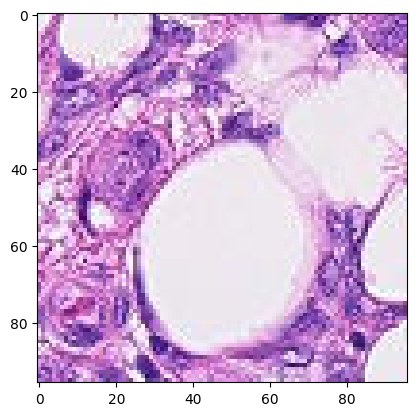

In [18]:
import matplotlib.pyplot as plt
img = plt.imread(os.path.join(TUMOR_PATH + tumor_files[1]))
plt.imshow(img)
plt.show()

## Augmentations

In [23]:
aug = A.Compose([
    A.OneOf([
        A.GridDistortion(p=0.8),
        A.ElasticTransform(p=0.5, alpha=120, sigma=120 * 0.05, alpha_affine=120 * 0.03),
    ], p=0.8),
    A.RandomRotate90(p=0.5),
    A.RandomCrop(width=96, height=96, p=0.7),
    A.VerticalFlip(p=0.5),
    A.HorizontalFlip(p=0.5),
    A.Transpose(p=0.5),
    A.Rotate(limit = 45, crop_border=True, p=0.5)
])

In [28]:
AUG_TUMOR_PATH = 'data/Augmented/tumor'
AUG_NON_TUMOR_PATH = 'data/Augmented/non_tumor'

In [29]:
image_extn = 'png'

In [30]:
def augment_and_save(image_files,org_path,target_path):
    
    os.makedirs(AUG_TUMOR_PATH, exist_ok=True)
    os.makedirs(AUG_NON_TUMOR_PATH, exist_ok=True)
    
    for i in range(len(image_files)):
        
        img = plt.imread(os.path.join(org_path, image_files[i]))
        
        for j in range(5):
            
            augmented = aug(image=img)
        
            aug_img = augmented['image']
            
            aug_img = cv2.resize(aug_img, (SIZE, SIZE))
            
            base_img_name = os.path.splitext(image_files[i])[0]

            tmp_img_name = f"{base_img_name}_{j}.{image_extn}"
            
            image_path = os.path.join(target_path, tmp_img_name)
        
            cv2.imwrite(image_path, aug_img)

In [31]:
augment_and_save(tumor_files,TUMOR_PATH,AUG_TUMOR_PATH)

KeyboardInterrupt: 

In [32]:
augment_and_save(non_tumor_files,NON_TUMOR_PATH,AUG_NON_TUMOR_PATH)

KeyboardInterrupt: 

## Splitting the Dataset into Train,Test and Validation in ratio (0.6,0.2,0.2)

In [34]:
import splitfolders

In [35]:
input_folder = 'data/Augmented/'

In [36]:
output_folder = 'data/Augmented_Splitted'

In [37]:
splitfolders.ratio(input_folder, output = output_folder, 
                   seed=42, ratio=(.6, .2, .2), 
                   group_prefix=None)

Copying files: 3993 files [00:17, 186.32 files/s]

KeyboardInterrupt: 

Copying files: 4023 files [00:30, 186.32 files/s]